### Import libraries 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm

The big disadvantage of using the normal equations is the complexity of finding the inverse of $X^T X$ which can be arbitrary huge depending on the data on the training set. A pretty preferrrable approach is using gradient descent which tracks the decrease on the loss function and moves towards it. 

### Generated random data

Use the diabetes data offered by skicit learn 

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Use 50 data points
X = diabetes_X[0:50]

# The true value of y
y = diabetes.target[0:50]


### Plot the data 


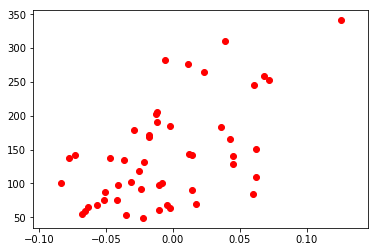

In [3]:
plt.scatter(X, y,  color='red')
plt.show()

The length of training and testing 

In [4]:
print ("The length of the data set " , len(X))

The length of the data set  50


### Insert columns of 1's
In order to rewrite $X\theta+b$ to $X\theta$ hence we don't need to worry about the bias term 

In [5]:
X=np.insert(X, 0, values=1.0, axis=1)

### Initialize the parameters 

In [6]:
M = X.shape[0]
N = X.shape[1]

theta = np.random.randn(N)
print(X.shape)
print(y.shape)
print(theta.shape)

(50, 2)
(50,)
(2,)


### Loss function 

$$L(\theta) = \frac{1}{2} \sum_{i=1}^m ||y^{(i)}-x^{(i)}\theta^T||^2$$

In a vectorized notation we have 

$$L(\theta) = \frac{1}{2} \left(y-X\theta \right)^T \left(y-X\theta \right)$$

In [7]:
def ssd(X,y,theta):
    return norm(y-X.dot(theta))/2

In [8]:
print(ssd(X,y,theta))

567.698929301


### Gradient of the hyper-parameters 

Note the loss function can be written 

$$L(\theta) = \frac{1}{2} \left(y^Ty-\theta^TX^Ty-yX\theta+\theta^T X^TX \theta \right)$$

By taking the gradient with respect to the parameters 

$$\frac{\partial L}{\partial \theta} = \frac{1}{2} \left(-2X^Ty +2X^TX \theta \right) $$

Which simplifies to the following 

$$\frac{\partial L}{\partial \theta}= X^T \left(X \theta -y \right)$$



### Training

In [76]:
def train(X,theta,y,itr = 1000 , lrate = 1e-2):
    for j in range(0, itr):
        f = X.dot(theta)
        gradient = (X.T).dot(f - y)
        theta = theta - gradient * lrate
        
        if j % 100 == 0:
            print ("The current loss is " , ssd(X,y,theta))
    return theta

In [77]:
thetahat = train(X,theta,y)

The current loss is  362.683362338
The current loss is  252.933456772
The current loss is  246.402064324
The current loss is  240.948561338
The current loss is  236.411339741
The current loss is  232.648405716
The current loss is  229.536273318
The current loss is  226.9685568
The current loss is  224.854371602
The current loss is  223.11664994


### Prediction 

Note that 

$$\hat{y} = X \hat{\theta}$$

In [78]:
yhat = X.dot(thetahat)

### Plot the regression solution 

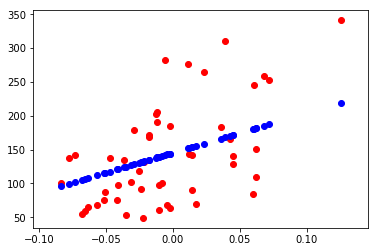

In [79]:
plt.scatter(X[:, 1], y,  color='red')
plt.scatter(X[:, 1], yhat,  color='blue')

plt.show()

### Regularization 

$$L(\theta) = \frac{1}{2} \left(y-X\theta \right)^T \left(y-X\theta \right) + \lambda ||\theta||^2$$

In [80]:
def reg_ssd(X,y,theta , lbda):
    return norm(y-X.dot(theta))/2+lbda*norm(theta)

### Gradient with regularization 

$$\frac{\partial L}{\partial \theta}= X^T \left(X \theta -y \right)+ 2 \lambda \theta$$


In [81]:
def reg_train(X,theta,y,lbda = 1e-2, itr = 1000 , lrate = 1e-2):
    for j in range(0, itr):
        f = X.dot(theta)
        gradient = (X.T).dot(f - y)
        theta = theta*(1-2*lbda) - gradient * lrate
        
        if j % 100 == 0:
            print ("The current loss is " , reg_ssd(X,y,theta , lbda))
    return theta

In [82]:
thetahat = reg_train(X,theta,y)

The current loss is  363.372076092
The current loss is  259.429646109
The current loss is  259.039807226
The current loss is  258.993424224
The current loss is  258.987885554
The current loss is  258.987223887
The current loss is  258.987144838
The current loss is  258.987135394
The current loss is  258.987134266
The current loss is  258.987134131


In [83]:
yhat = X.dot(thetahat)

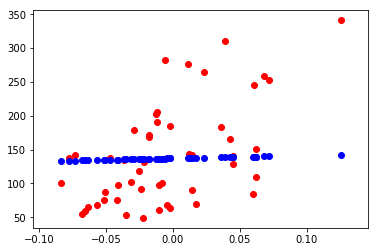

In [84]:
plt.scatter(X[:, 1], y,  color='red')
plt.scatter(X[:, 1], yhat,  color='blue')

plt.show()

Note the line becomes less senstive to outliers 